Author: Amber Camilleri

In [156]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import errorbar
import numpy as np
import pandas as pd
%matplotlib inline

import numpy as np
import scipy.stats

In [157]:
df = pd.read_csv("error_wiki_test.csv")
df.head()

,Unnamed: 0,Actual,Prediction
0,0,75,63
1,1,25,23
2,2,58,66
3,3,36,47
4,4,33,33


## Confidence Interval
Note: x-axis = Actual, y-axis = Predicted

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


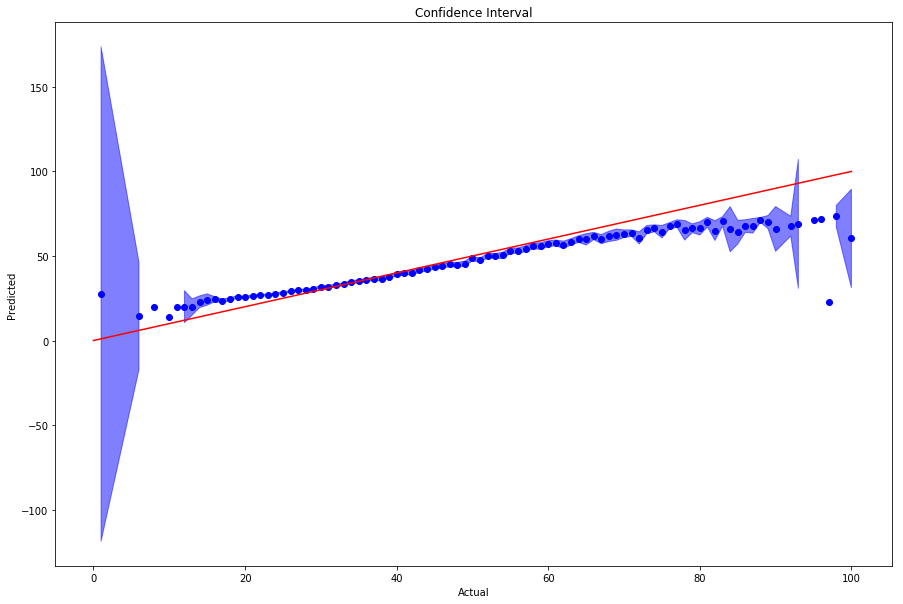

In [158]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


x=range(0,101)

plt.figure(figsize=(15,10))
plt.plot(x, x, color = 'r') # Plot y = x
df2=pd.DataFrame()

for i in df.Actual.unique():
    tmp=df[df['Actual'] == i]
    
    d = mean_confidence_interval(tmp.Prediction) 
    df2 = df2.append({'Actual': i, 'MeanPred': d[0], 'M-H':d[1], 'M+H':d[2]}, ignore_index=True)

df2.sort_values('Actual', inplace=True)

# Plot Mean and 95% Confidence Interval
plt.scatter(df2['Actual'], df2['MeanPred'], color='b')
plt.fill_between(df2['Actual'], df2['M+H'], df2['M-H'], interpolate=True, label='95% confidence interval',color='b', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confidence Interval')

plt.show()
# print(df2)

## Confidence Interval Using Seaborn
Note: x-axis = Predicted, y-axis = Actual

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


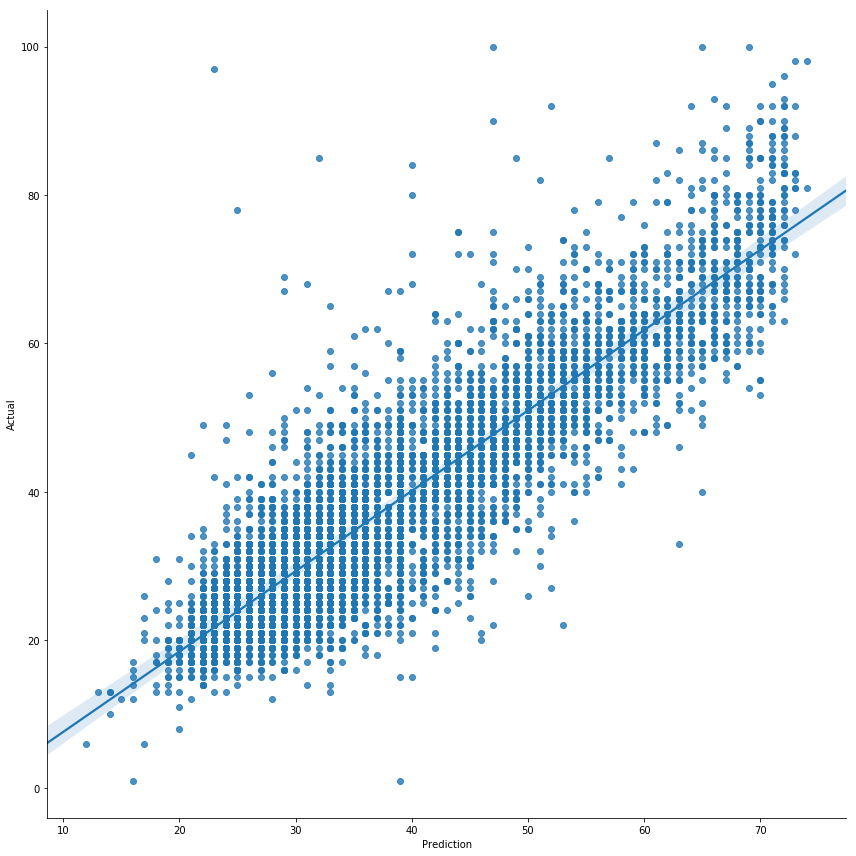

In [159]:
import seaborn as sns

sns.lmplot(x='Prediction', y='Actual', 
           data=df,
           units='Actual',
           size = 12)